In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./CPU_GPU.csv")

print(data.head())
print(data.info())
print(data.describe())

   Unnamed: 0               Name Codename Cores           Clock      Socket  \
0           0            A6-3500    Llano    3   2.1 to 2.4 GHz  Socket FM1   
1           1  Athlon II X3 400e     Rana    3          2.2 GHz  Socket AM3   
2           2  Athlon II X3 405e     Rana    3          2.3 GHz  Socket AM3   
3           3  Athlon II X3 415e     Rana    3          2.5 GHz  Socket AM3   
4           4  Athlon II X3 420e     Rana    3          2.6 GHz  Socket AM3   

  Process L3_Cache   TDP         Release  
0   32 nm      NaN  65 W  Aug 17th, 2011  
1   45 nm      NaN  45 W  Oct 20th, 2009  
2   45 nm      NaN  45 W  Oct 20th, 2009  
3   45 nm      NaN  45 W  May 11th, 2010  
4   45 nm      NaN  45 W  Sep 21st, 2010  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2614 non-null   int64 
 1   Name        2614 non-null   object


In [2]:
data['Clock'] = data['Clock'].str.extract(r'([\d.]+)').astype(float)
data['TDP'] = data['TDP'].str.extract(r'([\d.]+)').astype(float)
data['Process'] = data['Process'].str.extract(r'(\d+)').astype(float)
data['Cores'] = data['Cores'].str.extract(r'(\d+)').astype(float)

In [3]:
data['Release'] = pd.to_datetime(data['Release'], errors='coerce')

In [4]:
print(data.isnull().sum())

Unnamed: 0       0
Name             0
Codename       383
Cores          383
Clock          383
Socket         383
Process        394
L3_Cache      1424
TDP            383
Release       1333
dtype: int64


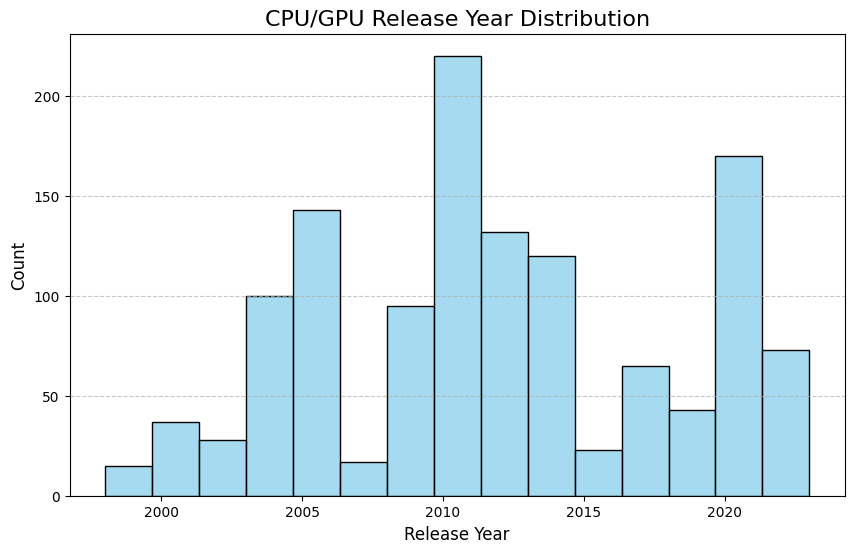

In [5]:
release_years = data['Release'].dt.year

plt.figure(figsize=(10, 6))
sns.histplot(release_years, bins=15, kde=False, color="skyblue")
plt.title("CPU/GPU Release Year Distribution", fontsize=16)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

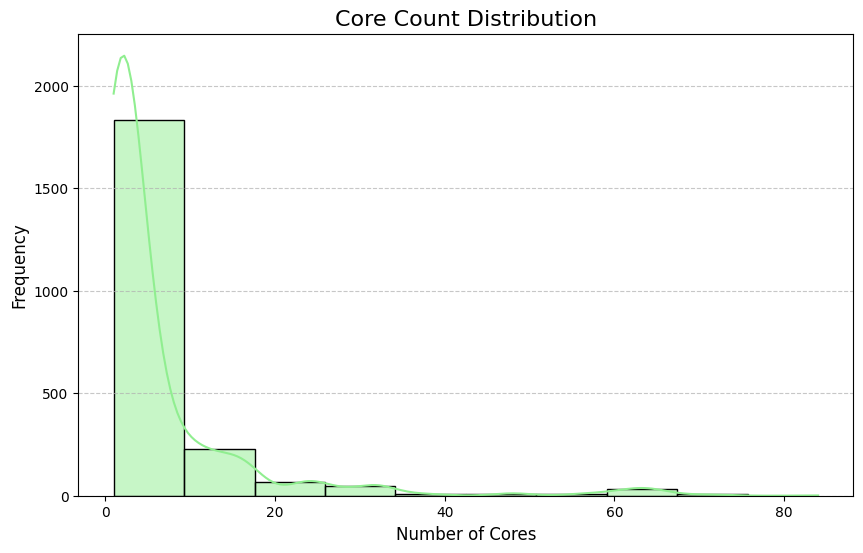

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Cores'], bins=10, kde=True, color="lightgreen")
plt.title("Core Count Distribution", fontsize=16)
plt.xlabel("Number of Cores", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

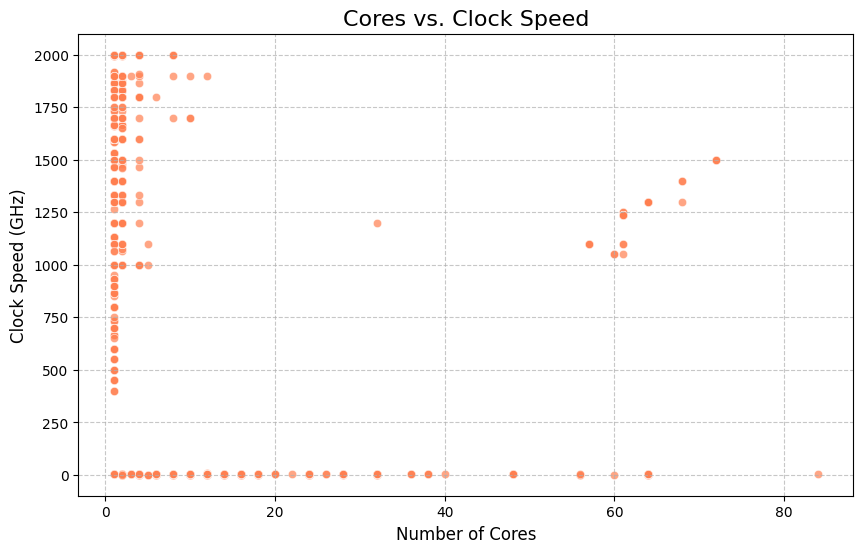

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Cores", y="Clock", data=data, alpha=0.7, color="coral")
plt.title("Cores vs. Clock Speed", fontsize=16)
plt.xlabel("Number of Cores", fontsize=12)
plt.ylabel("Clock Speed (GHz)", fontsize=12)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()

<ipython-input-8-67d58a81b64d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cores", y="TDP", data=data, palette="coolwarm")


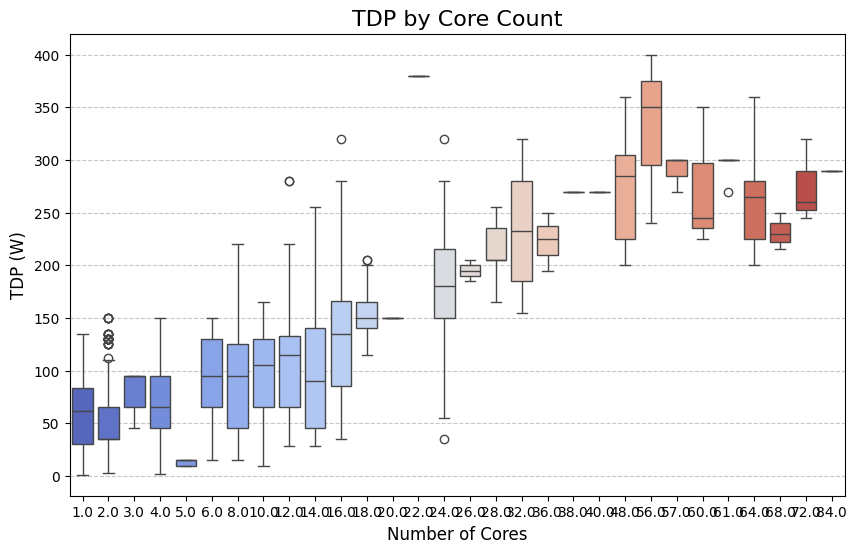

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cores", y="TDP", data=data, palette="coolwarm")
plt.title("TDP by Core Count", fontsize=16)
plt.xlabel("Number of Cores", fontsize=12)
plt.ylabel("TDP (W)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [9]:
data.to_csv('cleaned_CPU_GPU.csv', index=False)

print(data['Clock'].dtype)
print(data['Clock'].unique())
print(data['Clock'].head())

float64
[2.100e+00 2.200e+00 2.300e+00 2.500e+00 2.600e+00 2.700e+00 2.900e+00
 3.000e+00 3.100e+00 3.200e+00 3.300e+00 3.400e+00 2.400e+00 2.800e+00
 1.900e+03 1.000e+03 1.100e+03 1.000e+00 1.200e+00 1.500e+00 1.300e+00
 1.100e+00 1.600e+00 3.700e+00 1.700e+00 1.800e+00 3.600e+00 3.500e+00
 2.000e+00 1.700e+03 2.276e+00 3.800e+00 3.900e+00 7.300e+00 4.700e+00
 4.400e+00 4.000e+00 4.100e+00 1.400e+00 1.900e+00 3.050e+00 4.500e+00
 4.200e+00 2.650e+00 2.850e+00 4.050e+00 2.750e+00 2.950e+00 3.250e+00
 3.850e+00 1.200e+03       nan 1.053e+03 1.250e+03 1.238e+03 2.250e+00
 2.450e+00 1.300e+03 1.400e+03 1.500e+03 4.000e+02 4.500e+02 5.000e+02
 5.500e+02 6.000e+02 6.670e+02 7.330e+02 1.133e+03 6.500e+02 7.000e+02
 7.500e+02 8.000e+02 8.500e+02 9.000e+02 9.500e+02 8.660e+02 9.330e+02
 1.333e+03 2.000e+03 1.467e+03 1.533e+03 1.600e+03 1.733e+03 1.800e+03
 1.583e+03 1.667e+03 1.750e+03 1.833e+03 3.060e+00 1.266e+03 2.083e+00
 2.133e+00 2.167e+00 2.261e+00 2.527e+00 2.660e+00 2.793e+00 2.394e+0

In [10]:
data['Clock'] = data['Clock'].astype(str)
data['Clock'] = data['Clock'].fillna('0')
data['Clock'] = data['Clock'].astype(str)

data['TDP'] = data['TDP'].astype(str).str.extract(r'([\d.]+)').astype(float)
data['Process'] = data['Process'].astype(str).str.extract(r'(\d+)').astype(float)
data['Cores'] = data['Cores'].astype(str).str.extract(r'(\d+)').astype(float)

print(data[['Clock', 'TDP', 'Process', 'Cores']].info())
print(data[['Clock', 'TDP', 'Process', 'Cores']].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Clock    2614 non-null   object 
 1   TDP      2231 non-null   float64
 2   Process  2220 non-null   float64
 3   Cores    2231 non-null   float64
dtypes: float64(3), object(1)
memory usage: 81.8+ KB
None
  Clock   TDP  Process  Cores
0   2.1  65.0     32.0    3.0
1   2.2  45.0     45.0    3.0
2   2.3  45.0     45.0    3.0
3   2.5  45.0     45.0    3.0
4   2.6  45.0     45.0    3.0


In [14]:
columns_to_clean = ['Clock', 'TDP', 'Process', 'Cores']
patterns = [r'([\d.]+)', r'([\d.]+)', r'(\d+)', r'(\d+)']

for col, pattern in zip(columns_to_clean, patterns):
    data[col] = data[col].astype(str).fillna('0').str.extract(pattern).astype(float)


data['Release'] = pd.to_datetime(data['Release'], errors='coerce')
print(data['Release'].isnull().sum())

sample = data.sample(5)
print(sample[['Clock', 'TDP', 'Process', 'Cores', 'Release']])

1333
       Clock    TDP  Process  Cores    Release
1919  1877.0   35.0     32.0    2.0 2010-06-20
2090     2.0   45.0     32.0    4.0 2011-12-20
366   1200.0  300.0     45.0   32.0        NaT
1054  1800.0   85.0     90.0    1.0        NaT
1119     NaN    NaN      NaN    NaN        NaT
